# DECISION TREE REGRESSOR 

#### DIABETES PREDICTION

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
dir(dataset)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [6]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
dataset['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [12]:
X = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
y = dataset['target']

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [15]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


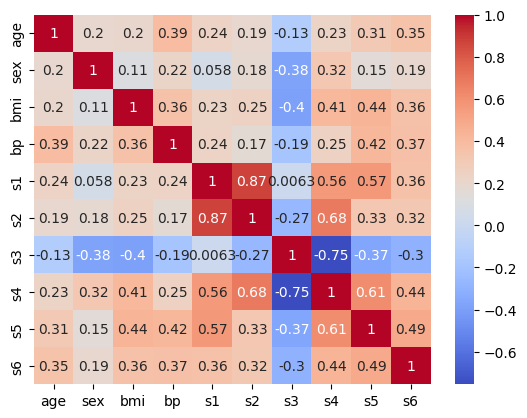

In [16]:
# visualization of correlation 
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
# Hyperparameter tuning on decision tree regressor
param = {
    'criterion': ['squared_error','mse','friedman_mse','mae','absolute_error'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
regressor = DecisionTreeRegressor()

In [23]:
grid = GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [24]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'mae', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [27]:
y_pred = grid.predict(X_test)

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 Score:',r2_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))


R2 Score: 0.2545584275556477
Mean Absolute Error: 56.72463166820564
Mean Squared Error: 4716.9090909904435


In [30]:
selectedmodel = DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_features='log2',splitter='best')

In [31]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2')

[Text(0.5, 0.875, 'x[2] <= 0.016\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[8] <= -0.004\nsquared_error = 3732.377\nsamples = 205\nvalue = 125.498'),
 Text(0.125, 0.375, 'x[6] <= 0.021\nsquared_error = 2200.983\nsamples = 120\nvalue = 101.508'),
 Text(0.0625, 0.125, 'squared_error = 2728.584\nsamples = 68\nvalue = 113.279'),
 Text(0.1875, 0.125, 'squared_error = 1092.91\nsamples = 52\nvalue = 86.115'),
 Text(0.375, 0.375, 'x[7] <= 0.031\nsquared_error = 3934.914\nsamples = 85\nvalue = 159.365'),
 Text(0.3125, 0.125, 'squared_error = 3424.171\nsamples = 37\nvalue = 131.865'),
 Text(0.4375, 0.125, 'squared_error = 3296.329\nsamples = 48\nvalue = 180.562'),
 Text(0.75, 0.625, 'x[9] <= 0.026\nsquared_error = 5403.399\nsamples = 104\nvalue = 206.433'),
 Text(0.625, 0.375, 'x[8] <= -0.025\nsquared_error = 4863.094\nsamples = 61\nvalue = 177.41'),
 Text(0.5625, 0.125, 'squared_error = 1763.182\nsamples = 15\nvalue = 122.467'),
 Text(0.6875, 0.125, 'squa

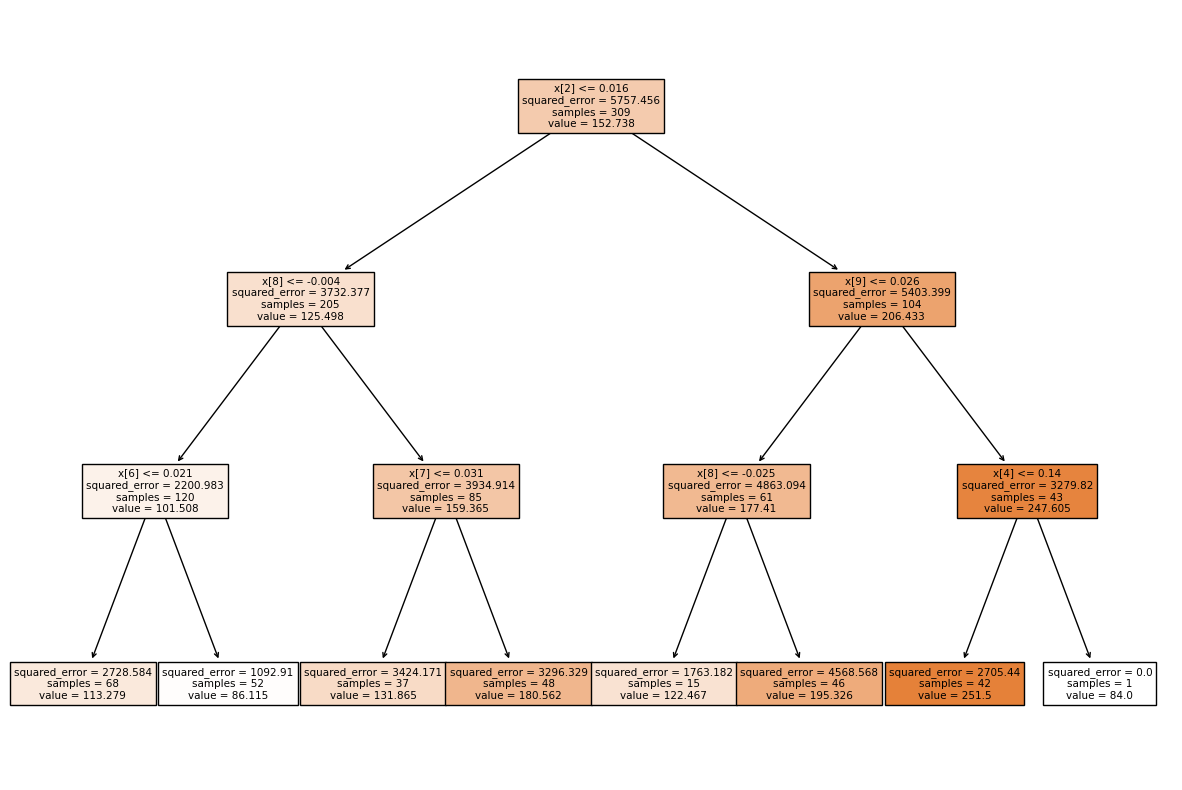

In [32]:
# Visualization tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)
